<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/AAPL_JumpDiffusion_Model_Analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
Consider selling the stock.
Current AAPL stock price: $231.49094813910017


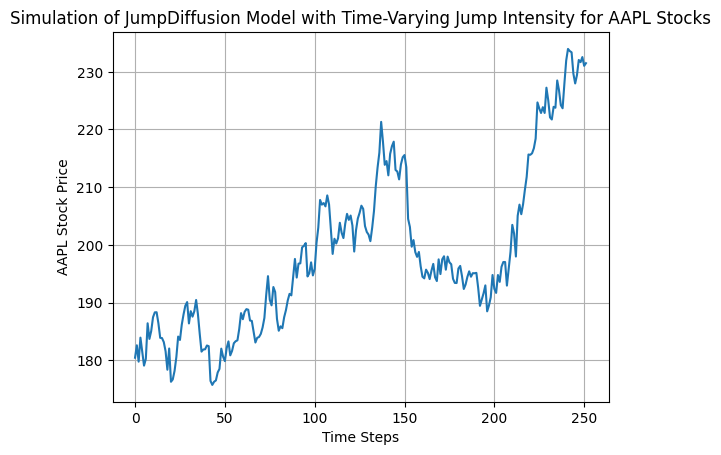

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm


# Define function to get stock price from Yahoo Finance
def get_stock_price(symbol, start_date):
    df = yf.download(symbol, start=start_date)
    return df['Adj Close'][0]

# Define functions for the JumpDiffusion model
def jump_diffusion_model(S0, r, sigma, delta_t, num_steps, jump_intensity):
    stock_prices = np.zeros(num_steps)
    stock_prices[0] = S0

    mu = 0.05  # Define the mean jump size

    for i in range(1, num_steps):
        z1 = np.random.normal(0, 1)
        z2 = np.random.normal(0, 1)
        N = np.random.poisson(jump_intensity[i] * delta_t)

        stock_prices[i] = stock_prices[i-1] * (1 + r * delta_t + sigma * np.sqrt(delta_t) * z1)
        stock_prices[i] += stock_prices[i-1] * (mu - 0.5 * sigma**2) * N * delta_t
        stock_prices[i] += stock_prices[i-1] * sigma * np.sqrt(N * delta_t) * z2

    return stock_prices

# Define parameters for the JumpDiffusion model
start_date = '2022-01-01'  # Specify the start date for collecting the stock price
S0 = get_stock_price('AAPL', start_date)  # Get the initial stock price of AAPL from Yahoo Finance
r = 0.05
sigma = 0.2
delta_t = 1/252
num_steps = 252

# Generate simulated stock prices using the JumpDiffusion model with time-varying jump intensity
jump_intensity = np.random.rand(num_steps) * 0.2 + 0.9  # Example: Time-varying jump intensity between 0.9 and 1.1
stock_prices = jump_diffusion_model(S0, r, sigma, delta_t, num_steps, jump_intensity)

# Obtain current market price of AAPL stock
current_stock_price = stock_prices[-1]

# Compare market price with initial price
price_difference = current_stock_price - S0

# Determine whether to buy or sell the stock based on the price difference
if price_difference > 0:
    print("Consider selling the stock.")
elif price_difference < 0:
    print("Consider buying the stock.")
else:
    print("No specific recommendation. Monitor the market closely.")

# Output the comparison results
print(f"Current AAPL stock price: ${current_stock_price}")

# Plot the simulated stock prices
plt.plot(stock_prices)
plt.xlabel('Time Steps')
plt.ylabel('AAPL Stock Price')
plt.title('Simulation of JumpDiffusion Model with Time-Varying Jump Intensity for AAPL Stocks')
plt.grid(True)

# Show the plot of simulated stock prices
plt.show()
